处理原始excel数据


In [54]:
import pandas as pd
import sys

def process_excel(file_path):
    try:
        # 读取Excel文件
        df = pd.read_excel(file_path)
        
        # 打印原始列名，帮助调试
        print("原始Excel文件中的列名：")
        print(df.columns.tolist())
        
        # 重命名第一列
        df = df.rename(columns={'文件名': 'decision_id'})
        
        # 处理decision_id列（原文件名列）
        df['decision_id'] = df['decision_id'].astype(str).apply(lambda x: x.split('.')[0] if '.' in x else x)
        
        # 获取其他列名
        columns = df.columns.tolist()
        
        # 处理第二列（包含complaint number的列）
        if len(columns) > 1:
            second_col = columns[1]
            df[second_col] = df[second_col].astype(str).apply(
                lambda x: x.replace('COMPLAINT NUMBER ', '').strip()
            )
        
        # 处理第三列（包含advertisement的列）
        if len(columns) > 2:
            third_col = columns[2]
            df[third_col] = df[third_col].astype(str).apply(
                lambda x: x.replace('ADVERTISER ', '')
            )

        # 处理第四列（包含advertisement的列）
        if len(columns) > 3:
            forth_col = columns[3]
            df[forth_col] = df[forth_col].astype(str).apply(
                lambda x: x.replace('ADVERTISEMENT ', '')
            )
        # 处理第五列（包含date的列）
        if len(columns) > 4:
            fifth_col = columns[4]
            def process_date(text):
                text = str(text)
                if text.startswith('DATE OF DECISION'):
                    return text.replace('DATE OF DECISION', '').strip()
                elif text.startswith('DATE OF MEETING'):
                    return text.replace('DATE OF MEETING', '').strip()
                return text
            
            df[fifth_col] = df[fifth_col].apply(process_date)
        
        # 处理第六列（包含OUTCOME的列）
        if len(columns) > 5:
            six_col = columns[5]
            df[six_col] = df[six_col].astype(str).apply(
                lambda x: x.replace('OUTCOME ', '')
            )

        # 处理第七列（包含COMPLAINT的列）
        if len(columns) > 6:
            seven_col = columns[6]
            def process_complaint(text):
                text = str(text)
                # 处理开头的逗号和结尾的逗号和空格
                text = text.strip(' ,')
    
                # 定义所有可能的前缀
                prefixes = [
                    'Complain t:',
                    'Complaint:',
                    'Summary of the ComplaintsBoardDecision',
                    'Summary of the Complaints Board Decision ',
                    'Advertisement'
                ]
    
                # 移除所有可能的前缀
                for prefix in prefixes:
                    if prefix in text:
                        text = text.replace(prefix, '').strip()
                        break
                
                return text.strip(' ,')
            
            df['complaints'] = df['complaints'].astype(str).apply(process_complaint)
        
        #12列
        if len(columns) > 11:  # 确保第12列存在
            twelve_col = columns[11]  # 获取第12列的列名
            df[twelve_col] = df[twelve_col].astype(str).apply(process_complaint)
        
            
        # 打印处理后的列名，帮助确认
        print("\n处理后的Excel文件列名：")
        print(df.columns.tolist())
        
        return df
        
    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
        sys.exit(1)
    except Exception as e:
        print(f"处理过程中出现错误：{str(e)}")
        sys.exit(1)

def main():
    try:
        # 替换为你的Excel文件路径
        input_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/model_BERT/excel/decision_18.xlsx'  # 请替换为你的输入文件名
        output_file = 'processed_18.xlsx'
        
        # 处理数据
        processed_df = process_excel(input_file)
        
        # 保存处理后的数据
        processed_df.to_excel(output_file, index=False)
        print(f"\n处理完成，结果已保存至 {output_file}")
        
    except Exception as e:
        print(f"程序执行出错：{str(e)}")
        sys.exit(1)

if __name__ == "__main__":
    main()

原始Excel文件中的列名：
['decision_id', 'complaint_number', 'advertiser', 'advertisement', 'date_of_meeting', 'outcome', 'complaints', 'istr', 'iend', 'len(complaints)', 'ttarr(i)', 'adver_', 'iadstr', 'iadend', 'len(adver)', 'ttarr(i)_adver']

处理后的Excel文件列名：
['decision_id', 'complaint_number', 'advertiser', 'advertisement', 'date_of_meeting', 'outcome', 'complaints', 'istr', 'iend', 'len(complaints)', 'ttarr(i)', 'adver_', 'iadstr', 'iadend', 'len(adver)', 'ttarr(i)_adver']

处理完成，结果已保存至 processed_18.xlsx


# 删除换行符


In [8]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook

def replace_newlines_in_excel(input_file, output_file):
    """
    替换Excel文件中所有单元格内的换行符为空格
    
    参数:
    input_file (str): 输入Excel文件路径
    output_file (str): 输出Excel文件路径
    """
    # 读取Excel文件中的所有sheet
    wb = load_workbook(input_file)
    
    # 遍历每个sheet
    for sheet_name in wb.sheetnames:
        ws = wb[sheet_name]
        
        # 遍历每个单元格
        for row in ws.iter_rows():
            for cell in row:
                if cell.value and isinstance(cell.value, str):
                    # 替换所有类型的换行符 (\n, \r, \r\n)
                    cell.value = cell.value.replace('\r\n', ' ').replace('\n', ' ').replace('\r', ' ')
    
    # 保存修改后的文件
    wb.save(output_file)
    print(f"处理完成! 已保存至: {output_file}")

# 使用示例
if __name__ == "__main__":
    input_file = "/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx"  # 替换为你的输入文件路径
    output_file = "/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx"  # 替换为你想要的输出文件路径
    replace_newlines_in_excel(input_file, output_file)

处理完成! 已保存至: /Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx


# xlsx转成csv

In [10]:
import pandas as pd
import os

def excel_to_csv(excel_file, encoding='utf-8'):
    """
    将Excel文件转换为CSV文件
    
    参数:
    excel_file (str): Excel文件路径
    encoding (str): 输出CSV文件的编码方式，默认utf-8
    """
    try:
        # 获取Excel文件的所有sheet
        xlsx = pd.ExcelFile(excel_file)
        sheet_names = xlsx.sheet_names
        
        # 获取文件名（不含扩展名）
        base_name = os.path.splitext(excel_file)[0]
        
        # 如果只有一个sheet，直接转换
        if len(sheet_names) == 1:
            df = pd.read_excel(excel_file)
            csv_file = f"{base_name}.csv"
            df.to_csv(csv_file, index=False, encoding=encoding)
            print(f"已创建CSV文件: {csv_file}")
        # 如果有多个sheet，为每个sheet创建一个CSV文件
        else:
            for sheet in sheet_names:
                df = pd.read_excel(excel_file, sheet_name=sheet)
                csv_file = f"{base_name}_{sheet}.csv"
                df.to_csv(csv_file, index=False, encoding=encoding)
                print(f"已创建CSV文件: {csv_file}")
        
        print("转换完成!")
        
    except Exception as e:
        print(f"转换过程中出现错误: {str(e)}")
        raise

if __name__ == "__main__":
    # 使用示例
    excel_file = "/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx"  # 替换为你的Excel文件路径
    
    if os.path.exists(excel_file):
        excel_to_csv(excel_file)
    else:
        print(f"错误: 找不到文件 {excel_file}")

已创建CSV文件: /Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.csv
转换完成!


# csv转换为xlsx

In [7]:
import pandas as pd

def csv_to_xlsx(csv_path, xlsx_path):
    """
    将给定的CSV文件转换为Excel文件。
    :param csv_path: CSV文件的路径。
    :param xlsx_path: 输出Excel文件的路径。
    """
    # 读取CSV文件
    data = pd.read_csv(csv_path)
    
    # 保存为Excel文件
    data.to_excel(xlsx_path, index=False, engine='openpyxl')  # index=False表示在Excel中不包含行索引

if __name__ == "__main__":
    # 设定CSV和Excel文件的路径
    csv_path = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.csv'
    xlsx_path = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx'
    
    # 调用函数
    csv_to_xlsx(csv_path, xlsx_path)
    print(f'File has been converted and saved at {xlsx_path}')


File has been converted and saved at /Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx


# 处理逗号和转换的数据类型

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime

def clean_and_convert_data(df):
    """
    清理和转换Excel数据，包括处理逗号和转换数据类型
    
    参数:
    df (pandas.DataFrame): 输入的数据框
    
    返回:
    pandas.DataFrame: 处理后的数据框
    """
    # 复制DataFrame以避免修改原始数据
    df_clean = df.copy()
    
    # 首先处理complaints和adver_列中的逗号
    def escape_commas(text):
        """处理文本中的逗号"""
        if pd.isna(text):
            return text
        return str(text).replace(',', '|')
    
    # 处理complaints列的逗号
    if 'complaints' in df_clean.columns:
        df_clean['complaints'] = df_clean['complaints'].apply(escape_commas)
    
    # 处理adver_列的逗号
    if 'adver_' in df_clean.columns:
        df_clean['adver_'] = df_clean['adver_'].apply(escape_commas)
    
    # 转换decision_id为int
    df_clean['decision_id'] = pd.to_numeric(df_clean['decision_id'], errors='coerce').astype('Int64')
    
    # 确保complaint_number为字符串
    df_clean['complaint_number'] = df_clean['complaint_number'].astype(str)
    
    # 确保advertiser和advertisement为字符串
    df_clean['advertiser'] = df_clean['advertiser'].fillna('').astype(str)
    df_clean['advertisement'] = df_clean['advertisement'].fillna('').astype(str)
    
    # 转换date_of_meeting为日期格式
    def convert_date(date_str):
        if pd.isna(date_str):
            return None
        try:
            # 处理多种日期格式
            formats = [
                '%d-%b-%Y',
                '%Y-%m-%d %H:%M:%S',
                '%d %B %Y',
                '%B %Y',
                '%d %b %Y'
            ]
            for fmt in formats:
                try:
                    return pd.to_datetime(date_str, format=fmt)
                except:
                    continue
            return pd.to_datetime(date_str)
        except:
            return None
    
    df_clean['date_of_meeting'] = df_clean['date_of_meeting'].apply(convert_date)
    
    # 计算complaints的长度
    df_clean['len_complaint'] = df_clean['complaints'].fillna('').astype(str).str.len()
    
    # 计算adver_的长度并重命名为len_adver
    df_clean['len_adver'] = df_clean['adver_'].fillna('').astype(str).apply(lambda x: len(x) if not pd.isna(x) else 0)
    
    # 删除原来的len(adver)列（如果存在）
    if 'len(adver)' in df_clean.columns:
        df_clean = df_clean.drop('len(adver)', axis=1)
    
    # 转换company_id为int（如果存在）
    if 'company_id' in df_clean.columns:
        df_clean['company_id'] = pd.to_numeric(df_clean['company_id'], errors='coerce').astype('Int64')
    
    return df_clean

# 使用示例
if __name__ == "__main__":
    try:
        # 读取CSV文件
        print("正在读取文件...")
        df = pd.read_csv('/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_18.csv')
        
        # 处理数据
        print("正在处理数据...")
        df_cleaned = clean_and_convert_data(df)
        
        # 保存结果
        print("正在保存文件...")
        df_cleaned.to_csv('/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_18.csv', index=False)
        print("数据处理完成！")
        
    except Exception as e:
        print(f"处理过程中出现错误: {str(e)}")

正在读取文件...
正在处理数据...
正在保存文件...
数据处理完成！


# 处理乱码
* 包括非二进制字符
* 错误拼写，like： complain t

In [58]:
import pandas as pd
import re

def clean_text(text):
    """文本清理函数"""
    if not text or pd.isna(text):
        return ""
        
    # 扩展字符映射表
    char_map = {
        '茅': 'é',
        '鈥檒': "'ll",
        '鈥?': "'",
        '鈥?': '"',
        '鈥': '',
        '檒': "'ll",
        '檚': "'s",
        '膩': 'ā',
        '檔': 'n',
        '檝': 've',
        '檋': 'h',
        '楥': 'C',
        '檓': 'm',
        '檇': 'd',
        '檛': 't',
        '檙': 're',
        '淕': 'G',
        '榣': 'l',
        '楽': 'S',
        '橮': 'N',
        '榝': 'f',
        '淓': 'E',
        '榮': 'n',
        '渨': 'w',
        '檉': 'f',
        '檆': 'c',
        '済': 'g',
        '渂': 'b',
        '︹': '…',
        '€': 'e',
        '榓': 'a',
        '榠': 'i',
        '渋': 'i',
        '淲': 'W',
        '淎': 'A',
        '淐': 'C',
        '渃': 'c',
        '渁': 'a',
        '渄': 'd',
        '淣': 'N',
        '測': 't',
        '淔': 'F',
        '橝': 'A',
        '橲': 'S',
        '檊': 'j',
        '檞': 'w',
        '淚': 'I',
        '淵': 'Y',
        '減': 'm',
        '淭': 'T',
        '渦': 'u',
        '楻': 'R',
        '淒': 'D',
        '淪': 'S',
        '渇': 'h',
        '渘': 'n',
        '淗': 'H',
        '淢': 'M',
        '榲': 'r',
        '淥': 'O',
        '渟': 's',
        '渉': 'h',
        '淧': 'P',
        '猫': 'é',
        '淛': 'J',
        '渢': 't',
        '溾': '',  # 移除这个字符
        '楴': 'N',
        '榥': 'n'
    }
    
    # 替换特殊字符
    for old_char, new_char in char_map.items():
        text = text.replace(old_char, new_char)
    
    # 清理多余空格
    text = re.sub(r'\s+', ' ', text)
    # 修复逗号前的空格
    text = re.sub(r'\s,', ',', text)
    # 规范化逗号后的空格
    text = re.sub(r',\s+', ', ', text)
    # 修复特定单词
    text = re.sub(r'Complain t', 'Complaint', text)
    # 最后再清理一次多余空格并去除首尾空格
    text = text.strip()
    
    return text

def clean_csv_data(input_file, output_file):
    """主清理函数"""
    try:
        # 读取CSV文件
        df = pd.read_csv(input_file)
        
        # 需要清理的文本列
        text_columns = [
            'advertiser',
            'advertisement',
            'outcome',
            'complaints',
            'ttarr(i)',
            'adver_',
            'ttarr(i)_adver'
        ]
        
        # 保持原始数据类型的列
        numeric_columns = [
            'istr',
            'iend',
            'len(complaints)',
            'iadstr',
            'iadend',
            'len(adver)'
        ]
        
        # 对每个文本列进行清理
        for col in text_columns:
            if col in df.columns:
                df[col] = df[col].apply(clean_text)
        
        # 确保数值列保持数值类型
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='ignore')
        
        # 保存清理后的数据
        df.to_csv(output_file, index=False, encoding='utf-8-sig')
        
        print(f'数据清理完成！已保存到：{output_file}')
        print(f'总行数：{len(df)}')
        
        # 返回示例数据以供检查
        print("\n清理后的数据样本：")
        for col in text_columns:
            if col in df.columns:
                print(f"\n{col}列的第一行数据：")
                print(df[col].iloc[0])
        
        return df
        
    except Exception as e:
        print(f'处理文件时出错: {str(e)}')
        raise

if __name__ == '__main__':
    input_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_18.csv'
    output_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_18.csv'
    
    cleaned_df = clean_csv_data(input_file, output_file)

数据清理完成！已保存到：/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_18.csv
总行数：424

清理后的数据样本：

advertiser列的第一行数据：
APPEAL NUMBER 18/010

advertisement列的第一行数据：
COMPLAINANT S Gribben

outcome列的第一行数据：
ADVERTISER New Zealand National Party

complaints列的第一行数据：


ttarr(i)列的第一行数据：


adver_列的第一行数据：


ttarr(i)_adver列的第一行数据：



/var/folders/hw/p2gkv4651zl5pzcfg3b974_h0000gn/T/ipykernel_79250/195927642.py:134: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


# 23年的complaint_id重写--》23/00n

In [9]:
import pandas as pd

def format_decision_id(value):
    """格式化decision_id值为 'YY/NNN' 形式"""
    # 检查是否为NaN
    if pd.isna(value):
        return None  # 或者返回一个默认值，如 'Unknown'
    
    try:
        # 确保value可以转换为整数
        str_value = str(int(value))
        return str_value[:2] + '/' + str_value[2:].zfill(3)
    except ValueError:
        print(f"ValueError: cannot convert {value} to integer.")
        return value  # 返回原值或处理错误情况

def process_excel(input_file, output_file):
    # 读取Excel文件
    df = pd.read_excel(input_file)
    
    # 检查所需列是否在数据中
    if 'decision_id' in df.columns:
        # 应用格式化函数到complaint_id列
        df['complaint_number'] = df['decision_id'].apply(format_decision_id)
    else:
        print("Error: 'decision_id' column not found in the data.")
        return
    
    # 保存更改后的DataFrame回Excel文件
    df.to_excel(output_file, index=False, engine='openpyxl')
    print(f'File has been processed and saved at {output_file}')

if __name__ == "__main__":
    input_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx'  # 替换为实际的Excel文件路径
    output_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx'  # 输出文件的路径
    process_excel(input_file, output_file)


ValueError: cannot convert decision_id to integer.
File has been processed and saved at /Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.xlsx


# 合并excel表格

In [1]:
import pandas as pd
import os

def merge_excel_files(file_list, output_file):
    # 初始化一个空的DataFrame
    combined_df = pd.DataFrame()

    # 循环读取所有文件
    for file in file_list:
        # 读取每个Excel文件
        df = pd.read_excel(file)
        # 将每个文件的DataFrame追加到总的DataFrame中
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    # 将合并后的DataFrame写入新的Excel文件
    combined_df.to_excel(output_file, index=False, engine='openpyxl')
    print(f"All files have been merged and saved to {output_file}")

if __name__ == "__main__":
    # 文件列表，替换成你需要合并的文件路径列表
    file_list = [
        '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_18.xlsx',
        '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_19.xlsx',
        '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_20.xlsx',
        '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_21.xlsx',
        '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_22.xlsx',
        '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/processed_23.xlsx'
    ]
    # 输出文件的路径
    output_file = 'combination_excel.xlsx'

    # 调用函数进行文件合并
    merge_excel_files(file_list, output_file)


All files have been merged and saved to combination_excel.xlsx


# 删除空

In [4]:
import pandas as pd

def remove_empty_complaints(input_file, output_file):
    # 读取Excel文件
    df = pd.read_excel(input_file)

    # 删除'complaint'列中有空值的行
    # 假设列名确切地为'complaint'
    cleaned_df = df.dropna(subset=['complaints','decision_id'])

    # 保存清理后的DataFrame到新的Excel文件
    cleaned_df.to_excel(output_file, index=False, engine='openpyxl')
    print(f"Empty complaints have been removed and the file is saved at {output_file}")

if __name__ == "__main__":
    input_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel.xlsx'  # 替换为实际的Excel文件路径
    output_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull.xlsx'  # 输出文件的路径
    
    # 调用函数进行处理
    remove_empty_complaints(input_file, output_file)


Empty complaints have been removed and the file is saved at /Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull.xlsx


# 选出complaint board的投诉

In [8]:
import pandas as pd

def filter_and_export_ids(input_file, output_txt_file):
    # 读取Excel文件
    df = pd.read_excel(input_file)

    # 确保'complaints'和'id'列存在
    if 'complaints' in df.columns and 'decision_id' in df.columns:
        # 筛选出'complaints'字段以指定字符串开始的行
        filtered_df = df[df['complaints'].str.startswith("The Complaints Board")]

        # 获取这些行的'id'
        ids = filtered_df['decision_id']

        # 将'id'写入文本文件
        with open(output_txt_file, 'w') as file:
            for id_value in ids:
                file.write(str(id_value) + '\n')
        
        print(f'Filtered IDs have been saved to {output_txt_file}')
    else:
        print("Error: Required columns are missing in the data.")

if __name__ == "__main__":
    input_file = '/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull.xlsx'  # Excel文件的路径
    output_txt_file = 'output_ids.txt'  # 输出文本文件的路径

    # 执行函数
    filter_and_export_ids(input_file, output_txt_file)


Filtered IDs have been saved to output_ids.txt


In [10]:
import pandas as pd

# 加载xlsx文件
df = pd.read_excel('filtered_file.xlsx')

# 筛选出complaints列开头不是"The Complaint Board"的行
df_filtered = df[~df['complaints'].str.startswith('The Complaints Board')]

# 将结果保存到新的xlsx文件中
df_filtered.to_excel('filtered_file.xlsx', index=False)


# 给adver标label+id



# 删一下xlsx里的换行fu

In [12]:
import pandas as pd
import openpyxl
import os

def clean_complaints_column(input_file: str, output_file: str = None) -> None:
    """
    Clean the 'complaints' column in an Excel file by removing newlines.
    
    Args:
        input_file (str): Path to the input Excel file
        output_file (str, optional): Path to save the cleaned file. If None, will overwrite input file
    """
    try:
        # Read the Excel file
        print(f"Reading file: {input_file}")
        df = pd.read_excel(input_file)
        
        # Check if 'complaints' column exists
        if 'complaints' not in df.columns:
            raise ValueError("No 'complaints' column found in the Excel file")
            
        # Store original number of rows for verification
        original_rows = len(df)
        
        # Clean the complaints column
        print("Cleaning complaints column...")
        df['complaints'] = df['complaints'].apply(lambda x: str(x).replace('\n', ' ').replace('\r', ' '))
        
        # Additional cleaning to remove multiple spaces
        df['complaints'] = df['complaints'].apply(lambda x: ' '.join(str(x).split()))
        
        # Verify the number of rows hasn't changed
        if len(df) != original_rows:
            raise ValueError("Row count changed during processing")
            
        # Determine output path
        if output_file is None:
            output_file = input_file
            
        # Save the cleaned file
        print(f"Saving cleaned file to: {output_file}")
        df.to_excel(output_file, index=False)
        
        print("Cleaning completed successfully!")
        print(f"Processed {len(df)} rows")
        
    except Exception as e:
        print(f"Error: {str(e)}")
        raise

def main():
    # Example usage
    try:
        input_file = "/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull.xlsx"  # Replace with your file name
        output_file = "/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull.xlsx"  # Optional: specify output file name
        
        # Basic input validation
        if not os.path.exists(input_file):
            raise FileNotFoundError(f"Input file not found: {input_file}")
            
        # Process the file
        clean_complaints_column(input_file, output_file)
        
    except Exception as e:
        print(f"Failed to process file: {str(e)}")
        
if __name__ == "__main__":
    main()

Reading file: /Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull.xlsx
Cleaning complaints column...
Saving cleaned file to: /Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull.xlsx
Cleaning completed successfully!
Processed 1679 rows


In [14]:
import pandas as pd

def process_adver_ids(df):
    """
    Process advertiser IDs according to the following rules:
    1. Start IDs from 20000
    2. Skip empty adver_ entries
    3. Assign same ID if adver_ matches previous non-empty value
    """
    
    # Initialize variables
    current_id = 20000
    last_valid_adver = None
    adver_id_map = {}  # To store adver_ to ID mapping
    
    # Create new adver_id column
    new_adver_ids = []
    
    # Process each row
    for adver in df['adver_']:
        if pd.isna(adver) or str(adver).strip() == '':
            # Empty value - assign None/NaN
            new_adver_ids.append(None)
        else:
            if adver in adver_id_map:
                # Existing advertiser - use saved ID
                new_adver_ids.append(adver_id_map[adver])
            else:
                # New advertiser - assign new ID
                adver_id_map[adver] = current_id
                new_adver_ids.append(current_id)
                current_id += 1
    
    # Update DataFrame
    df['adver_id'] = new_adver_ids
    
    # Sort the mapping for reference
    sorted_mapping = pd.DataFrame({
        'adver_': list(adver_id_map.keys()),
        'adver_id': list(adver_id_map.values())
    }).sort_values('adver_id')
    
    return df, sorted_mapping

def main():
    # Read the CSV file
    print("Reading CSV file...")
    df = pd.read_csv('combination_excel_withoutnull.csv')
    
    # Process the IDs
    print("Processing advertiser IDs...")
    df_processed, id_mapping = process_adver_ids(df)
    
    # Save results
    print("Saving processed data...")
    df_processed.to_csv('combination_excel_withoutnull.csv', index=False)
    
    # Print summary
    print("\nProcessing complete!")
    print(f"Total rows processed: {len(df)}")
    print(f"Unique advertisers assigned: {len(id_mapping)}")
    print("\nSample of ID mapping:")
    print(id_mapping.head())

if __name__ == "__main__":
    main()

Reading CSV file...
Processing advertiser IDs...
Saving processed data...

Processing complete!
Total rows processed: 1679
Unique advertisers assigned: 997

Sample of ID mapping:
                                              adver_  adver_id
0  : The billboard advertisement for Effen Vodka ...     20000
1  : The Rug Doctor television advertisement begi...     20001
2  is to showcase t o parents| the joy of inter -...     20002
3  : The Peanut Choc Toffee Pop s television adve...     20003
4  The television advertisement for PAKnSAVE desc...     20004


# 标complaint label

In [19]:
import pandas as pd
df = pd.read_csv('/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.csv')

ids1 = [20005, 20008, 20010, 20012, 20014, 20015, 20017, 20024, 20026, 20027, 20034, 20036, 20043, 20044, 20046, 20050, 20054, 20057, 20061, 20066, 20069, 20083, 20099, 20103, 20105, 20120, 20125, 20128, 20130, 20135, 20140, 20141, 20143, 20149, 20171, 20179, 20184, 20185, 20197, 20198, 20199, 20208, 20216, 20232, 20233, 20240, 20241, 20248, 20251, 20254, 20255, 20266, 20270, 20273, 20277, 20290, 20291, 20292, 20298, 20299, 20307, 20312, 20323, 20337, 20344, 20345, 20346, 20347, 20348, 20349, 20350, 20353, 20356, 20359, 20360, 20362, 20363, 20374, 20383, 20385, 20386, 20395, 20396, 20397, 20398, 20399, 20400, 20401, 20403, 20404, 20405, 20408, 20420, 20423, 20429, 20437, 20446, 20450, 20457, 20460, 20462, 20471, 21003, 21007, 21010, 21012, 21015, 21026, 21027, 21041, 21052, 21068, 21100, 21102, 21113, 21115, 21117, 21118, 21138, 21139, 21143, 21144, 21146, 21167, 21168, 21182, 21189, 21191, 21195, 21196, 21198, 21205, 21207, 21211, 21215, 21224, 21233, 21234, 21237, 21238, 21239, 21252, 21262, 21268, 21273, 21283, 21291, 21295, 21296, 21298, 21306, 21321, 21323, 21335, 21339, 21342, 21344, 21359, 21373, 21383, 21411, 21413, 21418, 21424, 21434, 21441, 21452, 21459, 21461, 21462, 21463, 21464, 21468, 21478, 21479, 21489, 21496, 21499, 21501, 21502, 21514, 21521, 21522, 21524, 21525, 21527, 21533, 21535, 21540, 21542, 21545, 21546, 21548, 21549, 21550, 21559, 21561, 21563, 21564, 21565, 21566, 21567, 21573, 21577, 21578, 21582, 22006, 22009, 22021, 22027, 22031, 22045, 22052, 22054, 22057, 22059, 22062, 22067, 22075, 22076, 22079, 22087, 22091, 22096, 22100, 22104, 22109, 22119, 22133, 22139, 22153, 22154, 22155, 22156, 22157, 22158, 22159, 22166, 22172, 22174, 22180, 22192, 22193, 22194, 22195, 22196, 22206, 22208, 22213, 22214, 22215, 22216, 22218, 22219, 22221, 22223, 22226, 22227, 22235, 22236, 22238, 22239, 22240, 22242, 22244, 22261, 22265, 22288, 22293, 22296, 22301, 22312, 22314, 22322, 22325, 22335, 22337, 22340, 22341, 22342, 22343, 22344, 22347, 22350, 22352, 22353, 22358, 22361, 22368, 22370, 22372, 22390, 22395, 22396, 22407, 22408, 22410, 22411, 23014, 23034, 23038, 23041, 23042, 23048, 23051, 23062, 23064, 23065, 23073, 23080, 23081, 23090, 23099, 23103, 23112, 23114, 23124, 23132, 23133, 23143, 23154, 23158, 23159, 23178, 23179, 23181, 23182, 23183, 23188, 23191, 23196, 20041, 20075, 20086, 20087, 20092, 20096, 20102, 20108, 20109, 20110, 20111, 20113, 20124, 20126, 20131, 20136, 20141, 20151, 20156, 20158, 20159, 20163, 20166, 20167, 20168, 20207, 20210, 20216, 20306, 20312, 20329, 20337, 20348, 20349, 20365, 20386, 20389, 20399, 20405, 20409, 20411, 20412, 20420, 20424, 20439, 20440, 20451, 20469, 20470, 20477, 20481, 20483, 20487, 20494, 20509, 20515, 20523, 20527, 20528, 20529, 20531, 20532, 20539, 20540, 20542, 20548, 20564, 20576, 20584, 20613, 21025, 21029, 21041, 21042, 21044, 21060, 21080, 21095, 21096, 21098, 21100, 21115, 21122, 21137, 21156, 21159, 21163, 21178, 21179, 21184, 21196, 21201, 21206, 21210, 21211, 21212, 21215, 21219, 21222, 21243, 21245, 21246, 21259, 21287, 21306, 21310, 21311, 21314, 21325, 21330, 21336, 21338, 21339, 21342, 21354, 21364, 21388, 21392, 21401, 21402, 21403, 21404, 21405, 21410, 21419, 21422, 21424, 21429, 21432, 21437, 21441, 21442, 21447, 21459, 21476, 21484, 21490, 21515, 21522, 21526, 21535, 21540, 21541, 21555, 21556, 21559, 21569, 21570, 22023, 22030, 22072, 22073, 22074, 22114, 22122, 22139, 22163, 22195, 22196, 22215, 22228, 22245, 22254, 22269, 22274, 22275, 22277, 22287, 22304, 22320, 22329, 22332, 22345, 22351, 22355, 22366, 22377,23006, 23009, 23011, 23018, 23030, 23033, 23053, 23055, 23058, 23059, 23063, 23106, 23122, 23126, 23130, 23133, 23133_1, 23134, 23135, 23144, 23146, 23149, 23164, 23190, 23191, 23207, 23214, 23215, 23225, 23231, 23232, 23271, 23277, 23302, 23303, 23308]
ids2 = [20017, 20108, 20109, 20111, 20141, 20143, 20145, 20148, 20152, 20154, 20156, 20158, 20159, 20160, 20165, 20166, 20167, 20180, 20194, 20200, 20322, 20341, 20356, 20369, 20374, 20385, 20386, 20399, 20400, 20406, 20416, 20431, 20454, 20483, 20527, 20545, 20553, 20558, 20565, 20568, 20569, 20576, 20605, 20607, 20614, 21016, 21025, 21033, 21045, 21055, 21060, 21075, 21083, 21115, 21129, 21153, 21160, 21199, 21201, 21213, 21215, 21216, 21217, 21275, 21280, 21296, 21317, 21330, 21338, 21339, 21350, 21372, 21377, 21383, 21402, 21407, 21413, 21422, 21434, 21437, 21448, 21469, 21470, 21477, 21523, 21540, 21562, 22012, 22016, 22023, 22032, 22041, 22076, 22086, 22112, 22119, 22122, 22127, 22129, 22134, 22195, 22267, 22275, 22306, 22332, 22344, 22352, 23009, 23023, 23033, 23048, 23050, 23055, 23120, 23121, 23122, 23130, 23133, 23133_1, 23134, 23135, 23167, 23172, 23200, 23259, 23314, 20001, 20002, 20019, 20069, 20113, 20173, 20207, 20214, 20284, 20307, 20318, 20331, 20345, 20367, 20369, 20373, 20394, 20399, 20451, 20465, 21003, 21004, 21012, 21030, 21040, 21051, 21073, 21082, 21108, 21145, 21167, 21271, 21293, 21306, 21320, 21321, 21329, 21333, 21379, 21468, 21473, 21476, 22055, 22057, 22061, 22062, 22066, 22067, 22071, 22074, 22086, 22142, 22144, 22165, 22340, 22341, 22342, 22343, 22344, 23030, 23118, 23124]
ids3 = [20001, 20002, 20003, 20013, 20025, 20028, 20030, 20032, 20035, 20037, 20040, 20041, 20042, 20045, 20048, 20052, 20053, 20056, 20059, 20063, 20067, 20069, 20074, 20076, 20077, 20079, 20080, 20084, 20088, 20089, 20090, 20094, 20095, 20139, 20186, 20210, 20215, 20312, 20318, 20330, 20337, 20357, 20359, 20371, 20385, 20392, 20411, 20434, 20438, 20451, 20476, 20477, 20499, 20539, 20542, 20555, 20570, 20575, 20578, 20601, 20612, 23008, 23018, 23024, 23038, 23047, 23054, 23061, 23078, 23171, 23219, 23246]
ids4 = [20011, 20017, 20019, 20020, 20030, 20033, 20060, 20086, 20088, 20090, 20102, 20126, 20133, 20137, 20139, 20145, 20147, 20153, 20154, 20158, 20173, 20181, 20182, 20188, 20196, 20200, 20201, 20202, 20203, 20204, 20205, 20207, 20215, 20219, 20225, 20228, 20230, 20242, 20245, 20249, 20260, 20264, 20271, 20281, 20329, 20331, 20336, 20339, 20357, 20358, 20361, 20377, 20378, 20379, 20389, 20390, 20393, 20412, 20414, 20439, 20442, 20451, 20459, 20467, 20468, 20478, 20479, 21001, 21003, 21008, 21018, 21030, 21031, 21037, 21039, 21040, 21047, 21066, 21101, 21108, 21112, 21116, 21119, 21124, 21127, 21129, 21143, 21145, 21149, 21153, 21156, 21161, 21163, 21165, 21171, 21177, 21179, 21189, 21192, 21211, 21214, 21225, 21235, 21248, 21257, 21258, 21265, 21266, 21267, 21269, 21273, 21279, 21280, 21281, 21285, 21288, 21301, 21304, 21316, 21318, 21324, 21328, 21332, 21334, 21358, 21381, 21383, 21388, 21394, 21395, 21397, 21400, 21401, 21406, 21414, 21421, 21427, 21432, 21436, 21437, 21439, 21443, 21448, 21453, 21460, 21462, 21464, 21466, 21470, 21473, 21477, 21479, 21486, 21494, 21506, 21509, 21516, 21517, 21519, 21521, 21523, 21525, 21531, 21533, 21534, 21535, 21536, 21546, 21552, 21556, 21559, 21560, 21561, 21570, 21571, 21579, 22002, 22009, 22019, 22020, 22024, 22026, 22029, 22032, 22034, 22035, 22036, 22037, 22038, 22039, 22040, 22041, 22044, 22046, 22047, 22049, 22051, 22052, 22054, 22056, 22059, 22068, 22071, 22075, 22077, 22089, 22090, 22091, 22095, 22103, 22111, 22124, 22126, 22127, 22128, 22129, 22131, 22150, 22151, 22152, 22163, 22167, 22169, 22179, 22180, 22183, 22184, 22187, 22188, 22190, 22191, 22193, 22194, 22196, 22197, 22200, 22202, 22203, 22204, 22205, 22206, 22207, 22210, 22211, 22215, 22216, 22218, 22219, 22225, 22226, 22229, 22232, 22233, 22241, 22243, 22247, 22249, 22250, 22252, 22254, 22256, 22259, 22272, 22276, 22280, 22281, 22283, 22288, 22290, 22291, 22292, 22299, 22302, 22306, 22321, 22322, 22327, 22334, 22346, 22347, 22355, 22360, 22362, 22364, 22386, 22391, 22393, 22395, 22403, 22404, 23007, 23008, 23014, 23018, 23024, 23027, 23030, 23036, 23038, 23040, 23041, 23047, 23054, 23055, 23057, 23059, 23061, 23070, 23071, 23072, 23078, 23124, 23128, 23134, 23136, 23137, 23139, 23140, 23141, 23142, 23166, 23167, 23169, 23170, 23171, 23175, 23178, 23191, 23219, 23246]
ids5 = [20007, 20011, 20019, 20020, 20032, 20033, 20056, 20068, 20078, 20080, 20090, 20103, 20109, 20117, 20118, 20147, 20148, 20159, 20162, 20166, 20170, 20182, 20185, 20186, 20194, 20212, 20215, 20216, 20219, 20224, 20249, 20250, 20269, 20271, 20289, 20296, 20298, 20301, 20310, 20319, 20325, 20331, 20334, 20337, 20358, 20360, 20368, 20373, 20378, 20379, 20380, 20407, 20410, 20423, 20435, 20447, 20473, 21002, 21015, 21016, 21029, 21037, 21039, 21040, 21044, 21047, 21049, 21055, 21064, 21066, 21084, 21100, 21101, 21106, 21108, 21112, 21121, 21124, 21141, 21157, 21163, 21165, 21179, 21189, 21248, 21250, 21251, 21259, 21267, 21270, 21271, 21274, 21280, 21284, 21289, 21304, 21305, 21314, 21331, 21333, 21334, 21345, 21356, 21360, 21363, 21365, 21366, 21367, 21379, 21387, 21389, 21390, 21391, 21392, 21394, 21395, 21397, 21398, 21402, 21404, 21405, 21409, 21419, 21431, 21435, 21444, 21447, 21463, 21473, 21475, 21477, 21480, 21483, 21485, 21486, 21488, 21495, 21515, 21516, 21521, 21525, 21541, 21554, 21566, 21575, 21577, 22002, 22016, 22018, 22024, 22027, 22028, 22036, 22038, 22040, 22041, 22049, 22059, 22063, 22067, 22068, 22069, 22074, 22088, 22098, 22102, 22111, 22113, 22121, 22129, 22137, 22143, 22144, 22145, 22148, 22150, 22171, 22179, 22182, 22183, 22184, 22198, 22211, 22228, 22229, 22232, 22234, 22236, 22237, 22246, 22249, 22250, 22251, 22255, 22259, 22267, 22268, 22269, 22270, 22271, 22272, 22273, 22274, 22275, 22276, 22277, 22278, 22279, 22284, 22286, 22291, 22292, 22336, 22348, 22349, 22353, 22355, 22364, 22375, 22378, 22382, 22386, 22391, 22394, 22399, 22400, 22405, 23003, 23005, 23011, 23012, 23013, 23017, 23019, 23022, 23025, 23028, 23036, 23040, 23049, 23070, 23071, 23077, 23096, 23097, 23106, 23109, 23118, 23121, 23122, 23128, 23134, 23138, 23157, 23161, 23162, 23167, 23169, 23170, 23172, 23173, 23175, 23187, 23191, 23192, 23193, 23261, 23307]
# 依次处理每个标签
def update_labels(row):
    labels = []
    
    # 检查每个ID列表并添加相应的标签
    if row['complaint_id'] in ids1:
        labels.append(1)
    if row['complaint_id'] in ids2:
        labels.append(2)
    if row['complaint_id'] in ids3:
        labels.append(3)
    if row['complaint_id'] in ids4:
        labels.append(4)
    if row['complaint_id'] in ids5:
        labels.append(5)
    
    # 如果没有匹配的标签，返回0
    if not labels:
        return 0
    
    # 如果有多个标签，将它们组合成字符串
    if len(labels) > 1:
        return ','.join(map(str, labels))
    
    # 如果只有一个标签，直接返回该标签
    return labels[0]

# 应用标签更新函数
df['label'] = df.apply(update_labels, axis=1)

# 保存结果到新的CSV文件
df.to_csv('/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.csv', index=False)

# 打印标签分布情况
print("\n标签分布情况：")
print(df['label'].value_counts())

# 打印多标签的情况
multi_labels = df[df['label'].astype(str).str.contains(',')]
if not multi_labels.empty:
    print("\n多重标签的记录：")
    print(multi_labels[['complaint_id', 'label']])



标签分布情况：
label
0          710
1          310
4          159
5          126
4,5         61
1,2         54
2           53
1,4         49
1,5         31
3           29
2,4         15
2,5         14
3,4         11
2,4,5       10
1,2,4        9
1,4,5        8
1,2,5        8
1,3          6
3,5          4
2,3          3
3,4,5        2
1,2,3        2
1,3,4        2
1,3,5        1
1,2,3,4      1
1,2,4,5      1
Name: count, dtype: int64

多重标签的记录：
      complaint_id  label
0            20001    2,3
1            20002    2,3
10           20011    4,5
16           20017  1,2,4
18           20019  2,4,5
...            ...    ...
1647         23171    3,4
1648         23172    2,5
1651         23175    4,5
1654         23178    1,4
1667         23191  1,4,5

[292 rows x 2 columns]


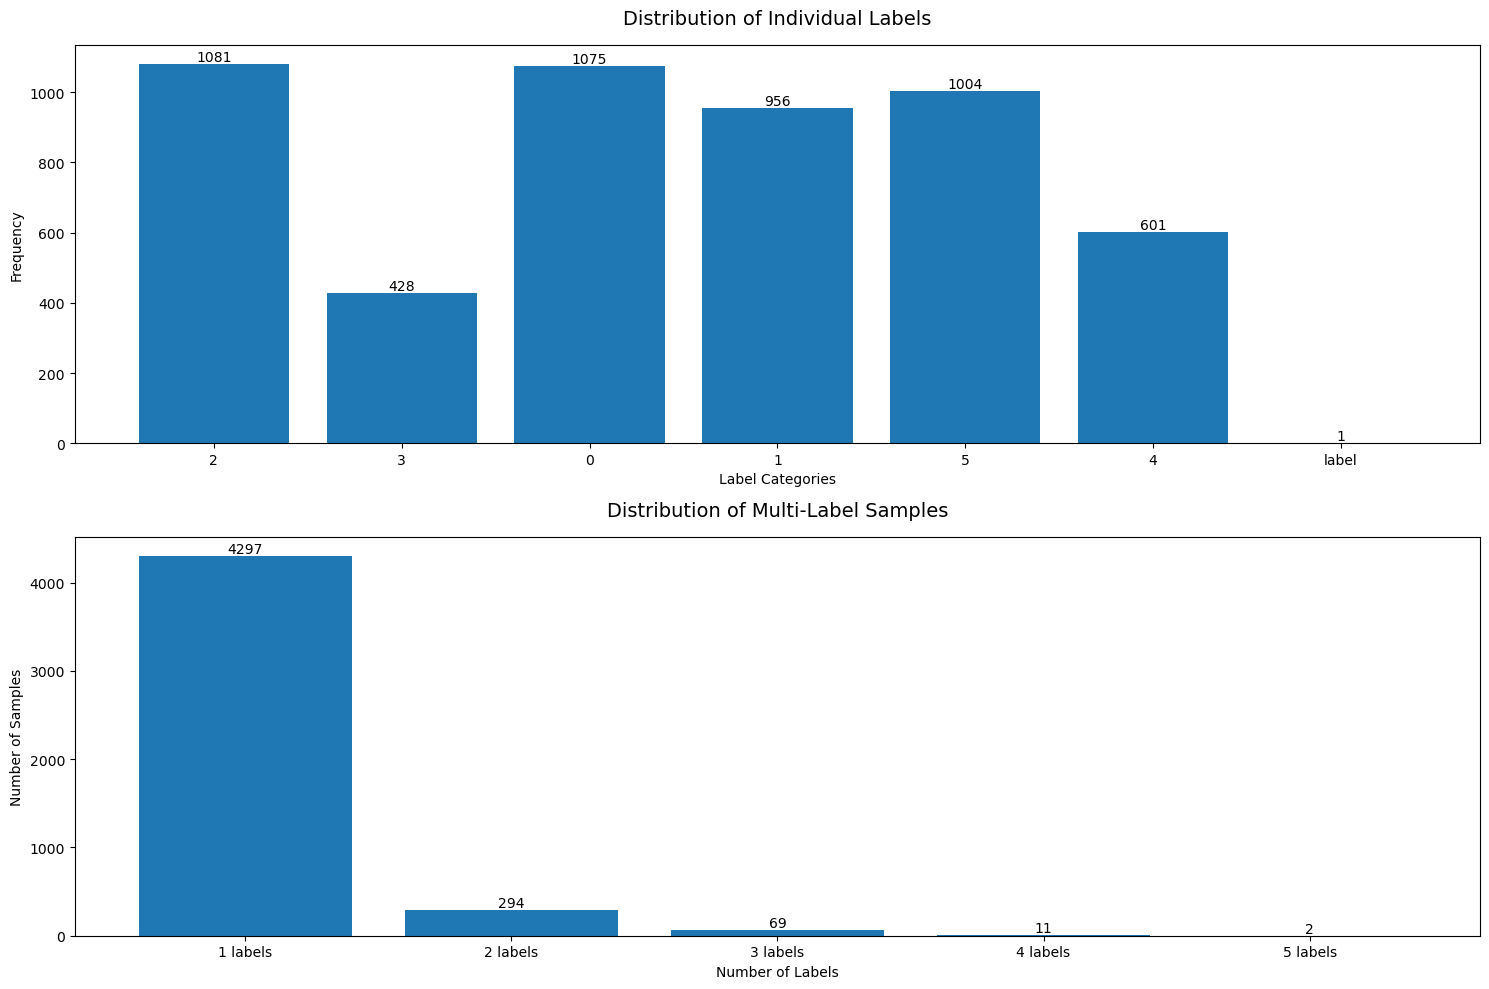


Label Distribution Statistics:
Label 2: 1081 samples
Label 3: 428 samples
Label 0: 1075 samples
Label 1: 956 samples
Label 5: 1004 samples
Label 4: 601 samples
Label label: 1 samples

Multi-Label Distribution Statistics:
Samples with 1 labels: 4297
Samples with 2 labels: 294
Samples with 3 labels: 69
Samples with 4 labels: 11
Samples with 5 labels: 2


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def plot_label_distribution(csv_path):
    # Read the CSV file
    df = pd.read_csv(csv_path)
    
    # Handle multi-label scenarios
    all_labels = []
    label_counts_per_sample = []
    
    for labels in df['label'].astype(str):
        # Split labels and clean them
        current_labels = [label.strip() for label in labels.split(',')]
        all_labels.extend(current_labels)
        label_counts_per_sample.append(len(current_labels))
    
    # Calculate the distribution of individual labels
    label_dist = Counter(all_labels)
    
    # Create the figure
    plt.figure(figsize=(15, 10))
    
    # 1. Distribution of individual labels
    plt.subplot(2, 1, 1)
    labels = list(label_dist.keys())
    counts = list(label_dist.values())
    
    bars = plt.bar(labels, counts)
    plt.title('Distribution of Individual Labels', fontsize=14, pad=15)
    plt.xlabel('Label Categories')
    plt.ylabel('Frequency')
    
    # Add numeric labels to the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Set y-axis to start from 0
    plt.ylim(bottom=0)
    
    # 2. Distribution of multi-label samples
    plt.subplot(2, 1, 2)
    multi_label_dist = Counter(label_counts_per_sample)
    
    x_labels = [f'{n} labels' for n in sorted(multi_label_dist.keys())]
    counts = [multi_label_dist[i] for i in sorted(multi_label_dist.keys())]
    
    bars = plt.bar(x_labels, counts)
    plt.title('Distribution of Multi-Label Samples', fontsize=14, pad=15)
    plt.xlabel('Number of Labels')
    plt.ylabel('Number of Samples')
    
    # Add numeric labels to the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Set y-axis to start from 0
    plt.ylim(bottom=0)
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Display the figure
    plt.show()

    # Print detailed statistics
    print("\nLabel Distribution Statistics:")
    for label, count in label_dist.items():
        print(f"Label {label}: {count} samples")
    
    print("\nMulti-Label Distribution Statistics:")
    for n_labels, count in sorted(multi_label_dist.items()):
        print(f"Samples with {n_labels} labels: {count}")

# Example usage
if __name__ == "__main__":
    # Replace with your CSV file path
    csv_path = "/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/combination_excel_withoutnull_labeled.csv"
    plot_label_distribution(csv_path)

# For more detailed analysis, you can add the following code:

def detailed_label_analysis(csv_path):
    df = pd.read_csv(csv_path)
    
    # Create a co-occurrence matrix for labels
    label_combinations = []
    for labels in df['label'].astype(str):
        current_labels = set(label.strip() for label in labels.split(','))
        if len(current_labels) > 1:
            label_combinations.extend([tuple(sorted([l1, l2])) 
                                    for l1 in current_labels 
                                    for l2 in current_labels 
                                    if l1 < l2])
    
    if label_combinations:
        cooccurrence = Counter(label_combinations)
        
        print("\nLabel Co-occurrence Statistics:")
        for (label1, label2), count in cooccurrence.most_common():
            print(f"Label {label1} and Label {label2} appeared together {count} times")
    
    # Calculate the percentage share of each label
    total_labels = sum(Counter(all_labels).values())
    print("\nPercentage Share of Each Label:")
    for label, count in Counter(all_labels).most_common():
        percentage = (count / total_labels) * 100
        print(f"Label {label}: {percentage:.2f}%")


In [5]:
import pandas as pd
df = pd.read_csv('/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/model_BERT/test_1.csv')

ids1 = [24015, 24021, 24022, 24023, 24025, 24029, 24031, 24033, 24034, 24037, 24038, 24044, 24046, 24050, 24051, 24057, 24061, 24063, 24069, 24070, 24073, 24074, 24076, 24077, 24079, 24080, 24081, 24082, 24083, 24084, 24088, 24098, 24101, 24104, 24106, 24109, 24116, 24117, 24120, 24121, 24122, 24123, 24127, 24129, 24130, 24134, 24135, 24136, 24142, 24143, 24147, 24149, 24150, 24151, 24152, 24155, 24156, 24157, 24159, 24163, 24164, 24168, 24176, 24178, 24179, 24183, 24184, 24185, 24191, 24193]
ids2 = [24002, 24003, 24004, 24005, 24007, 24011, 24013, 24016, 24017, 24019, 24020, 24022, 24023, 24029, 24032, 24035, 24036, 24041, 24042, 24048, 24052, 24054, 24056, 24058, 24062, 24064, 24065, 24066, 24067, 24068, 24069, 24070, 24072, 24074, 24075, 24077, 24079, 24085, 24086, 24089, 24090, 24091, 24093, 24094, 24095, 24096, 24100, 24102, 24103, 24104, 24105, 24106, 24107, 24108, 24110, 24112, 24113, 24114, 24119, 24121, 24122, 24124, 24125, 24126, 24128, 24129, 24132, 24133, 24136, 24137, 24138, 24140, 24145, 24146, 24148, 24149, 24151, 24152, 24154, 24155, 24158, 24159, 24160, 24161, 24165, 24166, 24167, 24168, 24169, 24171, 24172, 24173, 24174, 24175, 24177, 24180, 24181, 24182, 24183, 24185, 24186, 24187, 24189, 24190, 24193, 24194, 24196]
ids3 = [24002, 24003, 24004, 24005, 24006, 24013, 24029, 24035, 24036, 24041, 24042, 24047, 24053, 24054, 24056, 24060, 24067, 24068, 24070, 24087, 24091, 24093, 24094, 24095, 24096, 24097, 24103, 24106, 24110, 24117, 24124, 24128, 24130, 24137, 24144, 24147, 24149, 24158, 24159, 24161, 24165, 24171, 24172, 24177, 24185, 24190, 24194, 24195]
ids4 = [24006, 24018, 24020, 24036, 24040, 24042, 24054, 24060, 24062, 24064, 24068, 24072, 24075, 24103, 24106, 24107, 24118, 24124, 24125, 24126, 24128, 24137, 24148, 24149, 24153, 24155, 24158, 24159, 24161, 24167, 24171, 24172, 24173, 24178, 24186, 24189, 24190, 24193, 24194, 24196]
ids5 = [24002, 24003, 24004, 24005, 24007, 24011, 24013, 24019, 24028, 24030, 24032, 24035, 24041, 24052, 24053, 24058, 24062, 24067, 24068, 24069, 24075, 24089, 24094, 24101, 24102, 24103, 24105, 24107, 24110, 24112, 24115, 24124, 24125, 24126, 24127, 24128, 24129, 24132, 24136, 24138, 24139, 24141, 24144, 24149, 24155, 24159, 24160, 24161, 24165, 24167, 24168, 24169, 24171, 24172, 24174, 24177, 24180, 24181, 24182, 24185, 24187, 24189, 24190]
# 依次处理每个标签
def update_labels(row):
    labels = []
    
    # 检查每个ID列表并添加相应的标签
    if row['complaint_id'] in ids1:
        labels.append(1)
    if row['complaint_id'] in ids2:
        labels.append(2)
    if row['complaint_id'] in ids3:
        labels.append(3)
    if row['complaint_id'] in ids4:
        labels.append(4)
    if row['complaint_id'] in ids5:
        labels.append(5)
    
    # 如果没有匹配的标签，返回0
    if not labels:
        return 0
    
    # 如果有多个标签，将它们组合成字符串
    if len(labels) > 1:
        return ','.join(map(str, labels))
    
    # 如果只有一个标签，直接返回该标签
    return labels[0]

# 应用标签更新函数
df['label'] = df.apply(update_labels, axis=1)

# 保存结果到新的CSV文件
df.to_csv('/Users/niwenyu/Desktop/OCR_PDF_EXTRACT/model_BERT/test_1.csv', index=False)

# 打印标签分布情况
print("\n标签分布情况：")
print(df['label'].value_counts())

# 打印多标签的情况
multi_labels = df[df['label'].astype(str).str.contains(',')]
if not multi_labels.empty:
    print("\n多重标签的记录：")
    print(multi_labels[['complaint_id', 'label']])



标签分布情况：
label
1            41
0            25
2            20
2,5          19
2,3,5        12
1,2          11
2,3,4,5       8
2,4,5         7
2,4           7
2,3,4         6
2,3           5
5             5
3             4
4             4
1,2,5         4
1,3           3
1,5           2
1,2,3,4,5     2
3,5           2
1,2,3         2
3,4           2
1,2,3,4       1
1,2,4,5       1
1,4           1
1,2,3,5       1
1,2,4         1
Name: count, dtype: int64

多重标签的记录：
     complaint_id    label
1           24002    2,3,5
2           24003    2,3,5
3           24004    2,3,5
4           24005    2,3,5
5           24006      3,4
..            ...      ...
188         24189    2,4,5
189         24190  2,3,4,5
192         24193    1,2,4
193         24194    2,3,4
195         24196      2,4

[97 rows x 2 columns]
